In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns # Visualisation

%matplotlib inline
sns.set(color_codes=True)
# create tables
from tabulate import tabulate

# libraries for calculations & analysis
import statistics
import pylab
from scipy import stats

In [2]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
uploaded_df = pd.read_csv(file_path)

In [3]:
uploaded_df.head()

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0


In [4]:
## Determining the Gum Quantities available 

In [5]:
#Select all the rows where the phase HP is in the list below - HP is homogenisation of the final batch quantity
INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']
df_GumQuantity = uploaded_df[uploaded_df['INGRED_ID'].isin(INGRED_ID)]
print(df_GumQuantity)

      Unnamed: 0  Material    BATCHID Tank_1 Instruction_Step INGRED_ID  \
5              5   1002150  107643491   2503       STEP1_CONS   1461896   
6              6   1002150  107643491   2503       STEP1_CONS   1254972   
29            29   1002150  107762133   2503       STEP1_CONS   1461896   
30            30   1002150  107762133   2503       STEP1_CONS   1254972   
56            56   1002150  107829859   2504       STEP1_CONS   1461896   
...          ...       ...        ...    ...              ...       ...   
9357        9357   3044756  107916904   2503       STEP1_CONS   1461896   
9384        9384   3044756  107926393   2503       STEP1_CONS   1461896   
9411        9411   3044756  107940278   2503       STEP1_CONS   1461896   
9438        9438   3044756  108041496   2504       STEP1_CONS   1461896   
9466        9466   3055706  107737576   2502       STEP1_CONS   1254972   

                                INGRED_Name  Quantity       Phase_start  \
5     S501A             

Text(0, 0.5, 'Phase_overrun')

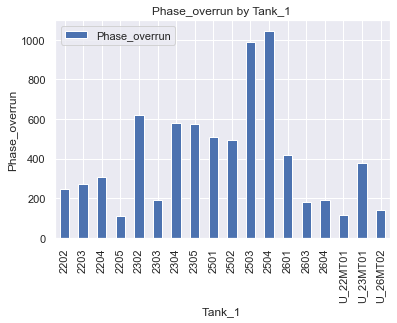

In [6]:
# uploaded_df

uploaded_df[['Tank_1','Phase_overrun']].groupby(by='Tank_1').count().plot.bar()
#plt.figure(figsize=(10, 6))
plt.title('Phase_overrun by Tank_1 ')
plt.xlabel('Tank_1 ')
plt.ylabel('Phase_overrun')
#plt.xticks(rotation = 90)
#plt.show()

Text(0, 0.5, 'Phase_overrun')

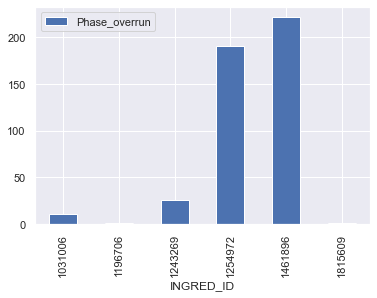

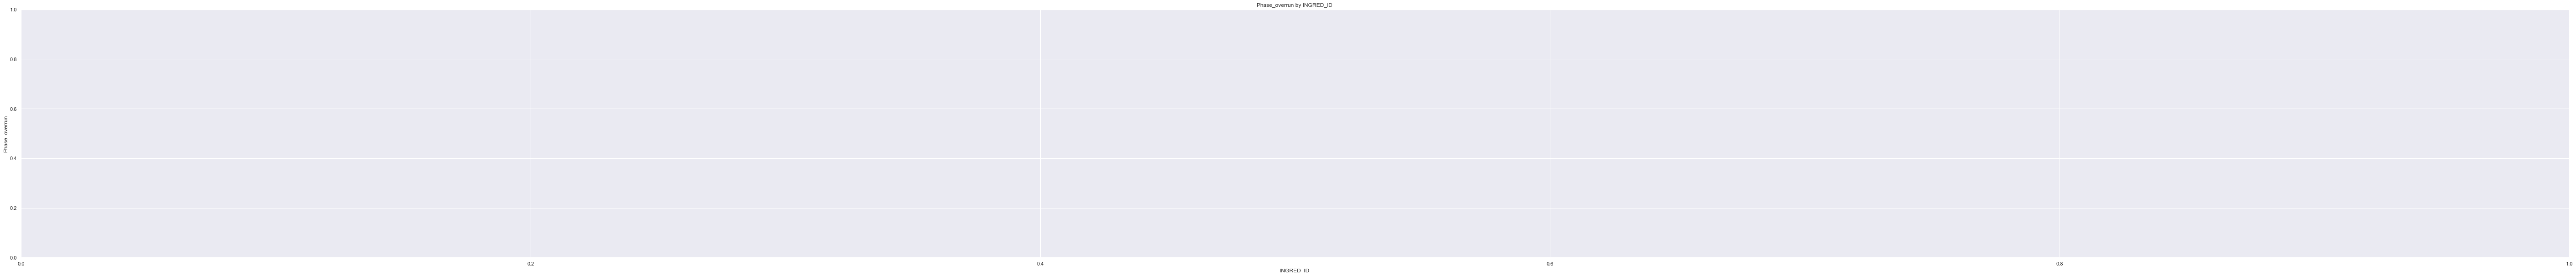

In [7]:
# df_GumQuantity

df_GumQuantity[['Phase_overrun','INGRED_ID']].groupby(by='INGRED_ID').count().plot.bar()
plt.figure(figsize=(100, 10))
plt.title('Phase_overrun by INGRED_ID ')
plt.xlabel('INGRED_ID ')
plt.ylabel('Phase_overrun')
#plt.xticks(rotation = 90)
#plt.show()

In [8]:
numeric_columns = ['Material','Deaeration Phase','Phase_row_no','Quantity','Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']

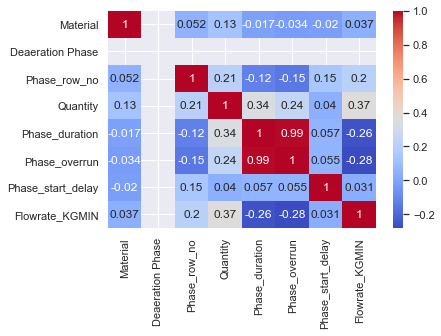

In [9]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = df_GumQuantity[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
df_GumQuantity.describe()

,Unnamed: 0,Material,BATCHID,Quantity,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
count,452.000000,4.520000e+02,4.520000e+02,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0
mean,4308.508850,1.556966e+06,1.078365e+08,1091.081920,97.112832,2.834071,7.488938,22.400547,34.012777,25.426991,73.603982,0.0
std,2728.773007,3.795622e+05,1.550044e+05,1024.076474,121.241940,40.932115,1.952283,34.567190,18.011824,15.791083,115.486920,0.0
min,5.000000,1.002150e+06,1.075483e+08,14.017000,2.000000,0.000000,3.000000,0.046700,6.318200,2.000000,0.000000,0.0
25%,1976.500000,1.397022e+06,1.077060e+08,240.150000,20.750000,0.000000,6.000000,4.894200,17.000000,14.000000,3.000000,0.0
50%,4161.500000,1.528294e+06,1.078356e+08,757.102500,57.000000,0.000000,7.000000,11.315150,38.461500,21.000000,28.500000,0.0
75%,6407.500000,1.775253e+06,1.079644e+08,1500.000000,128.000000,0.000000,8.000000,24.232175,53.600000,28.000000,97.000000,0.0
max,9466.000000,3.055706e+06,1.080913e+08,3500.000000,1150.000000,845.000000,15.000000,427.000000,53.600000,65.000000,1094.000000,0.0


### Investigation into the effect of gum on the batch production in this Tank 2202

In [18]:
GUMProductionTank2202_df= uploaded_df.query('Tank_1 == "%s"' % 2202)
print(GUMProductionTank2202_df) 

      Unnamed: 0  Material    BATCHID Tank_1  \
2001        2001   1397022  107956670   2202   
2002        2002   1397022  107956670   2202   
2003        2003   1397022  107956670   2202   
2004        2004   1397022  107956670   2202   
2005        2005   1397022  107956670   2202   
...          ...       ...        ...    ...   
7746        7746   1775253  108026760   2202   
7747        7747   1775253  108026760   2202   
7748        7748   1775253  108026760   2202   
7749        7749   1775253  108026760   2202   
7750        7750   1775253  108026760   2202   

                      Instruction_Step INGRED_ID  \
2001              S3_BATCH_IN_PROGRESS       NaN   
2002                        STEP1_CONS   1002565   
2003       PLEASE VERIFY BULK ADDITION       NaN   
2004                        STEP1_CONS   1037802   
2005                        STEP1_CONS   1002818   
...                                ...       ...   
7746      S4_BATCH_COMPLETE_QA_PENDING       NaN   
7747  T

In [19]:
#Select all the rows where GUM material is in the list below
INGRED_ID = ['1461896','1254972']
ProductionTank2202_dfGUM = GUMProductionTank2202_df[GUMProductionTank2202_df['INGRED_ID'].isin(INGRED_ID)]
ProductionTank2202_dfGUM=ProductionTank2202_dfGUM.drop(['Unnamed: 0', 'Instruction_Step','Phase_start', 'Phase_end'], axis=1)
# Or rename the existing DataFrame (rather than creating a copy)
ProductionTank2202_dfGUM.rename(columns={'Quantity': 'GUMQuantity','Phase_duration':'GUMPhase_duration','Phase_start_delay':'GUMPhase_start_delay','Flowrate_KGMIN':'GUMFlowrate_KGMIN','Phase_overrun':'GUMPhase_overrun'}, inplace=True)

#print(ProductionTank2202_dfGUM)

In [23]:
#Aggregate data per tank
aggregated_ProductionTank2202_dfGUM = ProductionTank2202_dfGUM.groupby(['BATCHID','Material']).agg({
    'GUMPhase_duration': 'sum',
    'GUMPhase_overrun': 'sum',
    'GUMPhase_start_delay':'sum',
    'GUMQuantity':'sum',
    'GUMFlowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    'Target_Flowrate':'sum',
    'INGRED_ID':'sum'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2202_dfGUM)

      BATCHID  Material  GUMPhase_duration  GUMPhase_overrun  \
0   107867810   1648637                467             436.0   
1   107899926   1775253               1030             974.0   
2   107956670   1397022                 60               0.0   
3   107964410   1775253                 67              11.0   
4   107978116   1648637                 37               5.0   
5   107993270   1428047                 80              19.0   
6   107999494   1775253                419             363.0   
7   108026759   1775253                 67              11.0   
8   108033603   1428047                 38               0.0   
9   108045117   1520984                155             127.0   
10  108073632   1451704                472             432.0   

    GUMPhase_start_delay  GUMQuantity  GUMFlowrate_KGMIN  \
0                      0     1144.778            31.1201   
1                      0     3000.000             2.9126   
2                      0     3896.000           104

Text(0, 0.5, 'Phase_overrun')

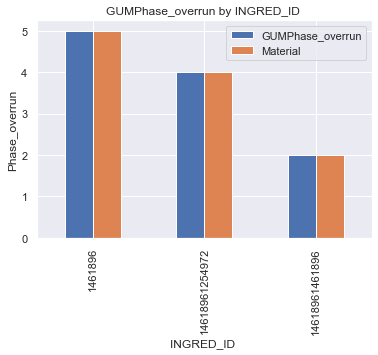

In [26]:
# uploaded_df

aggregated_ProductionTank2202_dfGUM[['GUMPhase_overrun','INGRED_ID','Material']].groupby(by='INGRED_ID').count().plot.bar()
#plt.figure(figsize=(10, 6))
plt.title('GUMPhase_overrun by INGRED_ID ')
plt.xlabel('INGRED_ID ')
plt.ylabel('Phase_overrun')
#plt.xticks(rotation = 90)
#plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'aggregated_ProductionTank2202_dfGUM' with your actual dataset)
df = pd.DataFrame(aggregated_ProductionTank2202_dfGUM)

# Define features and target
X = df.drop(['GUMPhase_overrun'], axis=1)
y = df['GUMPhase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)



                         Model     Train MSE       Test MSE  Train R2  \
0            Linear Regression  1.653944e-22     190.877941  1.000000   
1             Ridge Regression  9.473419e+04   53391.062291  0.122968   
2             Lasso Regression  3.131258e-01     626.227931  0.999997   
3      Random Forest Regressor  7.136266e+03    1393.756300  0.933934   
4  Gradient Boosting Regressor  7.655163e-05   21168.197183  1.000000   
5      Decision Tree Regressor  0.000000e+00  127610.000000  1.000000   

    Test R2  
0  0.993887  
1 -0.709827  
2  0.979945  
3  0.955366  
4  0.322097  
5 -3.086659  
